In [1]:

from AQUA_general import AQUA
from batchAQUA_general import batchAQUA
from stimulus import *
from plotting_functions import *
from phase_response import *


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from surface_plots import *

In [2]:
def make_Z(V, U, W, I, batch):
    """
    Calculate the gradient vector for each point in meshgrid and normalise.
    """
    N_neurons = batch.N_models
    # first, initialise batch with mesh coords
    x_start = np.zeros((N_neurons, 3))
    x_start[:, 0] = V.flatten()
    x_start[:, 1] = U.flatten()
    x_start[:, 2] = W.flatten()

    t_start = np.zeros(N_neurons)

    batch.Initialise(x_start, t_start)

    grad = batch.neuron_model(batch.x, 0., I)

    Z = np.linalg.norm(grad, axis = 1)
    Z = np.reshape(Z, shape = np.shape(V))
    
    return Z
    

In [3]:
# neuron params will determine the dynamics.

RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
     'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0., 'f': 0., 'tau': 0.}


#RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
#     'a': 0.03, 'b': 5, 'c': -50, 'd': 100, 'e': 0., 'f': 0., 'tau': 0.}


V_resolution, U_resolution = (100, 100)

I = 0


In [4]:
N_neurons = V_resolution * U_resolution

params = [RS for _ in range(N_neurons)]

params_df = pd.DataFrame(params)

batch = batchAQUA(params_df)

In [5]:
v_min = -80     #RS['v_r'] - 10
v_max = -20.      # RS['v_peak'] + 5
v_coords = np.linspace(v_min, v_max, V_resolution)

u_min = -200.
u_max = 200.
u_coords = np.linspace(u_min, u_max, U_resolution)

V, U = np.meshgrid(v_coords, u_coords)


W = np.zeros(np.shape(V))

Z = make_Z(V, U, W, I, batch)
print(np.shape(Z))


(100, 100)


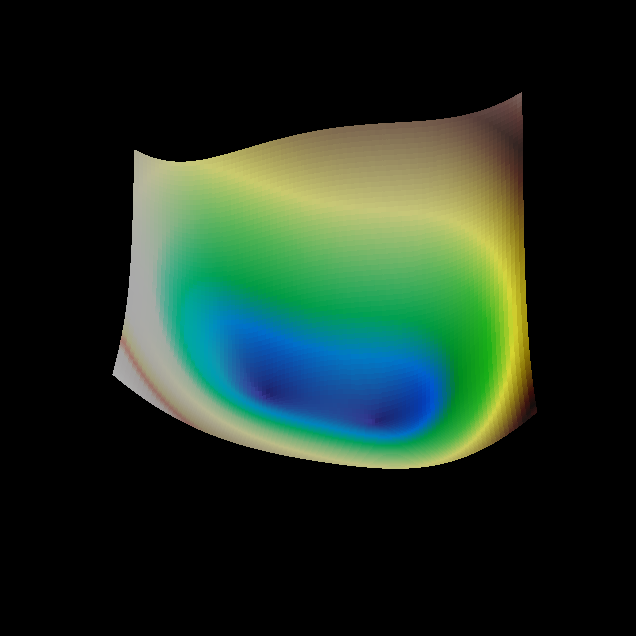

In [6]:

fig, ax = plt.subplots(1, 1, figsize = (8, 8), 
                       subplot_kw = dict(projection = '3d', facecolor = 'k'),
                        facecolor = 'k')

surf = plot_surface(ax, V, U, Z)
ax.view_init(elev = 50, azim = 270)
plt.show()



#### Animation

Here, the neuron has already been simulated.

So we have, time series X, injected current I

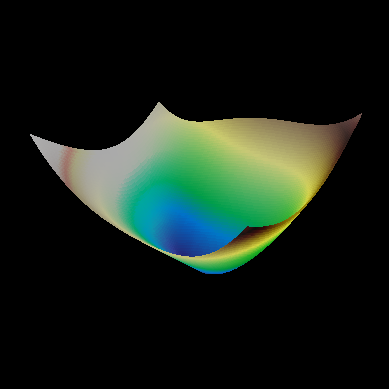

In [7]:
N_iter = 500
I = np.full(shape = (N_neurons, N_iter), fill_value = np.linspace(0, 100, N_iter))     # increasing gradient

ani = make_animation(V, U, W, I, batch, plot_surface, save = True)
